In [1]:
# Import the usual suspects for data manipulation, statistics, and visualisations.
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
from scipy import stats # contains stats functions and is used to visualise probability distributions
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns # a more user-friendly library used for visualisations

# Import the usual suspects for data manipulation, statistics, and visualisations.
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
from scipy import stats # contains stats functions and is used to visualise probability distributions
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns # a more user-friendly library used for visualisations

w = {}
w['frost'] = pd.read_csv('data/weather/wal_frost.csv')
w['max'] = pd.read_csv('data/weather/wal_max.csv')
w['mean'] = pd.read_csv('data/weather/wal_mean.csv')
w['min'] = pd.read_csv('data/weather/wal_min.csv')
w['rain'] = pd.read_csv('data/weather/wal_rain.csv')
w['raindays'] = pd.read_csv('data/weather/wal_raindays.csv')
w['sun'] = pd.read_csv('data/weather/wal_sun.csv')
e={}
e['frost'] = pd.read_csv('data/weather/eng_frost.csv').drop(['win','spr','sum','aut','ann'], axis=1)
e['max'] = pd.read_csv('data/weather/eng_max.csv').drop(['win','spr','sum','aut','ann'], axis=1)
e['mean'] = pd.read_csv('data/weather/eng_meantemp.csv').drop(['win','spr','sum','aut','ann'], axis=1)
e['min'] = pd.read_csv('data/weather/eng_min.csv').drop(['win','spr','sum','aut','ann'], axis=1)
e['rain'] = pd.read_csv('data/weather/eng_rain.csv').drop(['win','spr','sum','aut','ann'], axis=1) #EARLIEST
e['raindays'] = pd.read_csv('data/weather/eng_rain1.csv').drop(['win','spr','sum','aut','ann'], axis=1)
e['sun'] = pd.read_csv('data/weather/eng_sun.csv').drop(['win','spr','sum','aut','ann'], axis=1)
s={}
s['frost'] = pd.read_csv('data/weather/sco_frost.csv')
s['max'] = pd.read_csv('data/weather/sco_max.csv')
s['mean'] = pd.read_csv('data/weather/sco_mean.csv')
s['min'] = pd.read_csv('data/weather/sco_min.csv')
s['rain'] = pd.read_csv('data/weather/sco_rain.csv')
s['raindays'] = pd.read_csv('data/weather/sco_raindays.csv')
s['sun'] = pd.read_csv('data/weather/sco_sun.csv')
n={}
n['frost'] = pd.read_csv('data/weather/ni_frost.csv')
n['max'] = pd.read_csv('data/weather/ni_max.csv')
n['mean'] = pd.read_csv('data/weather/ni_mean.csv')
n['min'] = pd.read_csv('data/weather/ni_min.csv')
n['rain'] = pd.read_csv('data/weather/ni_rain.csv')
n['raindays'] = pd.read_csv('data/weather/ni_raindays.csv')
n['sun'] = pd.read_csv('data/weather/ni_sun.csv')
u={}
u['frost'] = pd.read_csv('data/weather/uk_frost.csv').drop(['win','spr','sum','aut','ann'], axis=1)
u['max'] = pd.read_csv('data/weather/uk_max.csv').drop(['win','spr','sum','aut','ann'], axis=1)
u['mean'] = pd.read_csv('data/weather/uk_mean.csv').drop(['win','spr','sum','aut','ann'], axis=1)
u['min'] = pd.read_csv('data/weather/uk_min.csv').drop(['win','spr','sum','aut','ann'], axis=1)
u['rain'] = pd.read_csv('data/weather/uk_rain.csv').drop(['win','spr','sum','aut','ann'], axis=1)
u['raindays'] = pd.read_csv('data/weather/uk_raindays.csv').drop(['win','spr','sum','aut','ann'], axis=1)
u['sun'] = pd.read_csv('data/weather/uk_sun.csv').drop(['win','spr','sum','aut','ann'], axis=1)

observables = ['frost','max','mean','min','raindays','sun']

#https://data.ceda.ac.uk/badc/ukmo-midas-open/data/uk-hourly-weather-obs/dataset-version-202308/south-yorkshire/00527_high-bradfield/qc-version-1

In [2]:
#Set initial empty dictionary and use 'rain' as the basis for each 
#country dictionary as it starts with the earliest values

mlt = {}
eng = e['rain'].melt(id_vars=['year'], var_name='month', value_name='rain')

#Loop over each variable to create full dataframes for each country, 
#Melting each original file into a suitable shape and adding it on 
#to the previous columns

for obs in observables:
    mlt[obs] = e[obs].melt(id_vars=['year'], var_name='month', value_name=obs)
    eng = pd.merge(eng, mlt[obs] ,  how='outer', left_on=['year','month'], right_on = ['year','month'])
    
#Add a label column for later on when making one big dataframe    
eng['country'] = 'England'


In [3]:
mlt = {}
wal = w['rain'].melt(id_vars=['year'], var_name='month', value_name='rain')

for obs in observables:
    mlt[obs] = w[obs].melt(id_vars=['year'], var_name='month', value_name=obs)
    wal = pd.merge(wal, mlt[obs] ,  how='outer', left_on=['year','month'], right_on = ['year','month'])
wal['country'] = 'Wales'


In [4]:
mlt = {}
sco = s['rain'].melt(id_vars=['year'], var_name='month', value_name='rain')

for obs in observables:
    mlt[obs] = s[obs].melt(id_vars=['year'], var_name='month', value_name=obs)
    sco = pd.merge(sco, mlt[obs] ,  how='outer', left_on=['year','month'], right_on = ['year','month'])
sco['country'] = 'Scotland'


In [5]:
mlt = {}
ni = n['rain'].melt(id_vars=['year'], var_name='month', value_name='rain')

for obs in observables:
    mlt[obs] = n[obs].melt(id_vars=['year'], var_name='month', value_name=obs)
    ni = pd.merge(ni, mlt[obs] ,  how='outer', left_on=['year','month'], right_on = ['year','month'])
ni['country'] = 'NI'


In [6]:
mlt = {}
uk = u['rain'].melt(id_vars=['year'], var_name='month', value_name='rain')

for obs in observables:
    mlt[obs] = u[obs].melt(id_vars=['year'], var_name='month', value_name=obs)
    uk = pd.merge(uk, mlt[obs] ,  how='outer', left_on=['year','month'], right_on = ['year','month'])
uk['country'] = 'UK'


In [7]:
# Now change the months to numeric versions:

In [8]:
datemap = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9,'oct':10,'nov':11,'dec':12}
eng['month'] = eng.month.map(datemap)
sco['month'] = sco.month.map(datemap)
wal['month'] = wal.month.map(datemap)
ni['month'] = ni.month.map(datemap)
uk['month'] = uk.month.map(datemap)

In [9]:
# Set up a dataframe with the UK averages.
# Add a date column to organise better.

uk['date'] = pd.to_datetime(dict(year=uk.year, month=uk.month, day=28))
uk.sort_values(by='date', inplace = True) 
uk = uk.reset_index().drop(['index'], axis=1)
uk.head(1)

,year,month,rain,frost,max,mean,min,raindays,sun,country,date
0,1836,1,101.5,NaN,NaN,NaN,NaN,NaN,NaN,UK,1836-01-28


In [10]:
# Set up a dataframe with all the regions plus the UK averages.

ukall = pd.concat([eng,sco,wal,ni,uk])#.reset_index()
ukall['date'] = pd.to_datetime(dict(year=ukall.year, month=ukall.month, day=28))
ukall.sort_values(by='date', inplace = True) 
ukall = ukall.reset_index().drop(['index'], axis=1)
ukall.head(1)

,year,month,rain,frost,max,mean,min,raindays,sun,country,date
0,1836,1,65.1,NaN,NaN,NaN,NaN,NaN,NaN,England,1836-01-28


In [11]:
# Set up a dataframe with just the regions Eng, Sco, Wal, NI.

ukc = pd.concat([eng,sco,wal,ni])#.reset_index()
ukc['date'] = pd.to_datetime(dict(year=ukc.year, month=ukc.month, day=28))
ukc.sort_values(by='date', inplace = True) 
ukc = ukc.reset_index().drop(['index'], axis=1)
ukc.head(1)

,year,month,rain,frost,max,mean,min,raindays,sun,country,date
0,1836,1,65.1,NaN,NaN,NaN,NaN,NaN,NaN,England,1836-01-28


In [12]:
ukall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11280 entries, 0 to 11279
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   year      11280 non-null  int64         
 1   month     11280 non-null  int64         
 2   rain      11280 non-null  float64       
 3   frost     3840 non-null   float64       
 4   max       8400 non-null   float64       
 5   mean      8400 non-null   float64       
 6   min       8400 non-null   float64       
 7   raindays  7980 non-null   float64       
 8   sun       6840 non-null   float64       
 9   country   11280 non-null  object        
 10  date      11280 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 969.5+ KB


## Mean temperatures by country

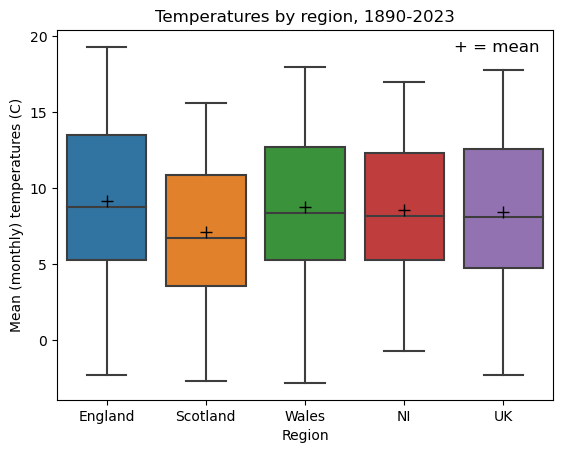

In [13]:
sns.boxplot(x='country',y='mean', data = ukall, showmeans=True,
            meanprops={'marker':'+',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black','markersize':'8'},order=['England', 'Scotland', 'Wales','NI','UK'])
plt.ylabel('Mean (monthly) temperatures (C)')
plt.xlabel('Region')
plt.title('Temperatures by region, 1890-2023')
plt.text(3.5,19,'+ = mean',size='12');

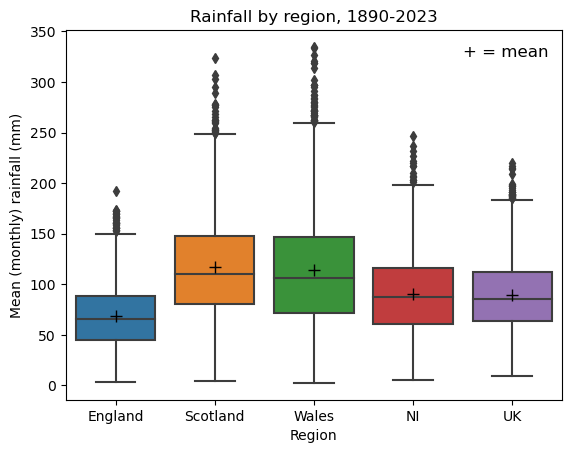

In [14]:
sns.boxplot(x='country',y='rain', data = ukall, showmeans=True,
            meanprops={'marker':'+',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black','markersize':'8'},order=['England', 'Scotland', 'Wales','NI','UK'])
plt.ylabel('Mean (monthly) rainfall (mm)')
plt.xlabel('Region')
plt.title('Rainfall by region, 1890-2023')
plt.text(3.5,325,'+ = mean',size='12');

## Have different parts of the UK wamed at different rates since 1890?

In [15]:
#What about mean annual temperature each month (groupby year), for the last 150 years, hue = country

In [16]:
#There's quite a big gap in the data before 1890 so lets start there...
tempmask = ukc['max'].notnull()
uk1890 = ukc[tempmask]         

In [17]:
uktemps = uk1890[['year','month','mean','country','date']].copy()
uktemps.head()

,year,month,mean,country,date
2304,1884,1,5.8,Wales,1884-01-28
2305,1884,1,5.7,England,1884-01-28
2306,1884,1,3.5,Scotland,1884-01-28
2307,1884,1,5.6,NI,1884-01-28
2308,1884,2,3.0,Scotland,1884-02-28


In [18]:
annualmean = uktemps.groupby(by=['year','country']).mean()
annualmean

month       mean                date
year country                                       
1884 England     6.5   9.258333 1884-07-13 08:00:00
     NI          6.5   8.675000 1884-07-13 08:00:00
     Scotland    6.5   7.041667 1884-07-13 08:00:00
     Wales       6.5   8.691667 1884-07-13 08:00:00
1885 England     6.5   8.100000 1885-07-13 12:00:00
...              ...        ...                 ...
2022 Wales       6.5  10.200000 2022-07-13 12:00:00
2023 England     6.5  10.875000 2023-07-13 12:00:00
     NI          6.5  10.166667 2023-07-13 12:00:00
     Scotland    6.5   8.266667 2023-07-13 12:00:00
     Wales       6.5  10.391667 2023-07-13 12:00:00

[560 rows x 3 columns]

In [19]:
#Put the indices back as columns for plotting...
annualmean = annualmean.reset_index()
annualmean = annualmean.rename(columns={"country": "Region"})
annualmean

,year,Region,month,mean,date
0,1884,England,6.5,9.258333,1884-07-13 08:00:00
1,1884,NI,6.5,8.675000,1884-07-13 08:00:00
2,1884,Scotland,6.5,7.041667,1884-07-13 08:00:00
3,1884,Wales,6.5,8.691667,1884-07-13 08:00:00
4,1885,England,6.5,8.100000,1885-07-13 12:00:00
...,...,...,...,...,...
555,2022,Wales,6.5,10.200000,2022-07-13 12:00:00
556,2023,England,6.5,10.875000,2023-07-13 12:00:00
557,2023,NI,6.5,10.166667,2023-07-13 12:00:00
558,2023,Scotland,6.5,8.266667,2023-07-13 12:00:00


C:\Users\matro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


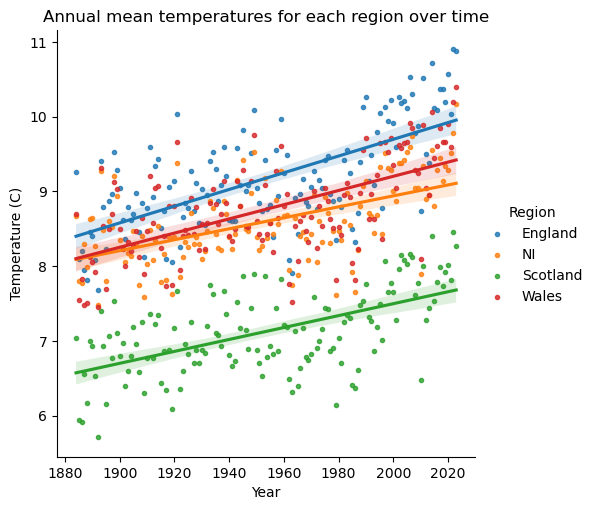

In [20]:
anmeanplt = sns.lmplot(x = 'year', y = 'mean', hue = "Region", data = annualmean, markers = '.')
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.title('Annual mean temperatures for each region over time');

# Does El Nino correspond to drier UK winters?

In [21]:
# Whilst no definitive definition of El Nino years, this list
# corresponds to the strongest such years since 1890.
# From https://psl.noaa.gov/enso/climaterisks/years/top24enso.html
elnino = [1997,1982,1972,1930,1965,1902,1991,1941,1925,1987,1896,1957,2009,2006,1918,2002,1914,1905,1940,1977,1899,1963]

In [22]:
# We only want the late winter months,so picked out Jan-Mar each year.
# Then sum over the rainfall to get a total amount in those months per year.

wintermonths = uk[uk['month'].isin([1, 2, 3])]
winterrain = wintermonths[['rain','year','month']].groupby(by=['year','month']).mean()
winterrain_tot = winterrain.groupby(by='year').sum()

# reset the column. 
winterrain_tot['year'] = winterrain_tot.index

(80.0, 520.0)

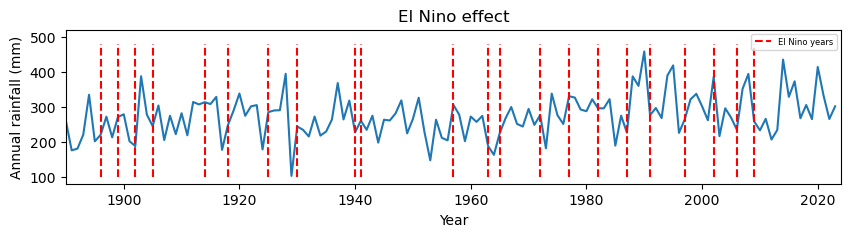

In [23]:
plt.figure(figsize = (10,2))
rain_elnino_plt = sns.lineplot(x = 'year', y = 'rain', data = winterrain_tot)         
rain_elnino_plt.vlines(x = elnino, ymin = 100, ymax = 480, color='red',linestyle = '--',label = 'El Nino years') 
rain_elnino_plt.set_xlim(1890,2024)
plt.legend(loc = 'best',facecolor='white', prop={'size': 6})
plt.title('El Nino effect')
plt.ylabel('Annual rainfall (mm)')
plt.xlabel('Year')
plt.ylim(80,520)



In [24]:
# If we want, can sde the top 20 years by uncommenting:

#years = winterrain_tot.sort_values(by='rain')[['year']].head(20)
#years

In [25]:
elnino; #Can compare these with the cell above to see if any match? Doesn't look like it.

### Simple plot of average uk temperatures by month

In [26]:
uk2 = uk[uk['max'].notnull()].drop('country',axis=1)[['max','mean','min','month','year']]
uk2

,max,mean,min,month,year
576,7.3,5.0,2.7,1,1884
577,6.8,4.2,1.4,2,1884
578,8.5,5.1,1.8,3,1884
579,10.1,6.2,2.2,4,1884
580,14.5,9.7,5.0,5,1884
...,...,...,...,...,...
2251,19.3,15.3,11.4,8,2023
2252,19.4,15.2,11.0,9,2023
2253,14.0,10.8,7.6,10,2023
2254,9.3,6.3,3.4,11,2023


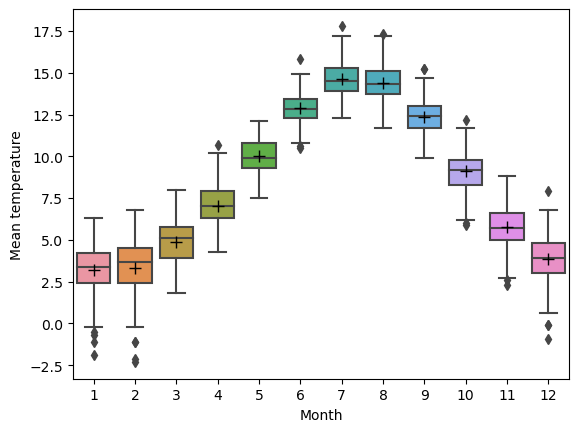

In [27]:
sns.boxplot(x='month',y='mean', data = uk2, showmeans=True,
            meanprops={'marker':'+',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black','markersize':'8'});
plt.xlabel('Month')
plt.ylabel('Mean temperature')
x=uk2['month']


Text(0.5, 1.0, 'Mean Monthly temperatures compared to day length/seasons')

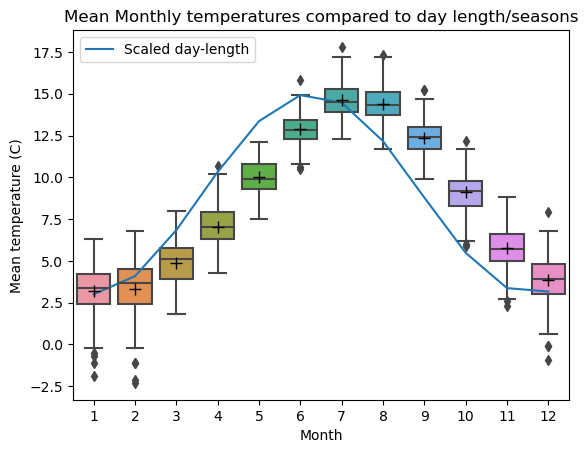

In [28]:
ax = sns.boxplot(x='month',y='mean', data = uk2, showmeans=True,
            meanprops={'marker':'+',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black','markersize':'8'})
sindata = np.linspace(0,6.5, 12, endpoint=True)
ax2 = plt.plot(np.sin((sindata-1.55))*6+9,label = 'Scaled day-length')
plt.xlabel('Month')
plt.ylabel('Mean temperature (C)')
plt.legend(loc = 'upper left')
x=uk2['month']
plt.title('Mean Monthly temperatures compared to day length/seasons')

### Raindays - has intensity of the rain increased, when it does rain?


In [29]:
# By dividing the total amount of rain by the number of days it rains, we can 
# see how much it rains on the days it does - if the intensity has increased.

ukraindays = ukc[ukc['raindays'].notnull()][['year','month','raindays','rain','country']]
ukraindays['intensity'] = ukraindays['rain']/ukraindays['raindays']

In [30]:
ukraindays.describe()

,year,month,raindays,rain,intensity
count,6384.000000,6384.000000,6384.000000,6384.000000,6384.000000
mean,1957.000000,6.500000,14.320410,99.417528,6.687745
std,38.395715,3.452323,4.987603,51.155411,1.759547
min,1891.000000,1.000000,0.600000,2.400000,2.528302
25%,1924.000000,3.750000,10.700000,62.200000,5.435794
50%,1957.000000,6.500000,14.300000,91.300000,6.446441
75%,1990.000000,9.250000,18.000000,128.700000,7.673249
max,2023.000000,12.000000,29.000000,334.700000,14.229008


C:\Users\matro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


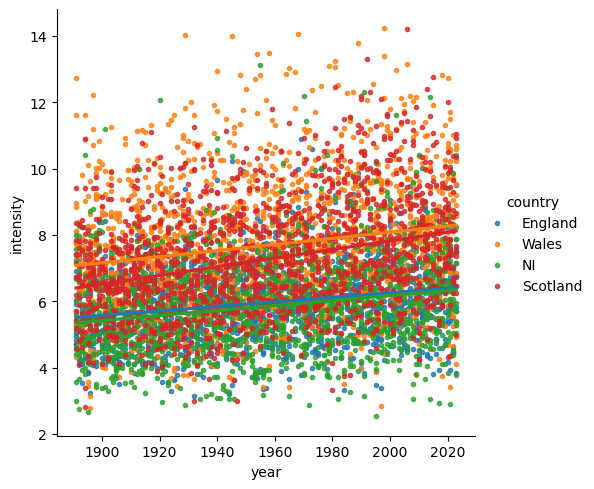

In [31]:
sns.lmplot(data=ukraindays, x='year',y='intensity', hue='country',markers='.')

In [32]:
#When it rains, it rains more in Scotland and Wales than England and NI. The amount of rain per wet day is increasing
#in all regions though, most quickly in Scotland.


C:\Users\matro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Intensity of rain since 1900')

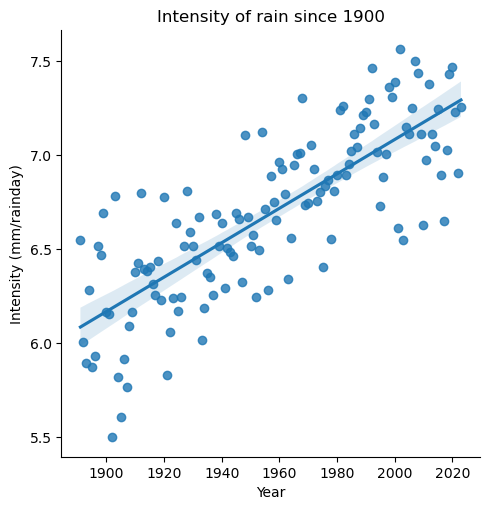

In [33]:
meanukraindays = ukraindays.drop('country',axis=1).groupby(by=['year']).mean()
meanukraindays.reset_index(inplace=True)
sns.lmplot(data=meanukraindays,x='year',y='intensity').set(xlabel='Year', ylabel='Intensity (mm/rainday)')
plt.title('Intensity of rain since 1900')

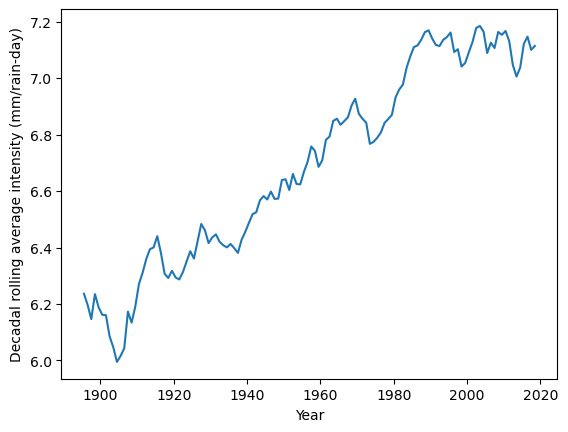

In [34]:
sns.lineplot(data = meanukraindays.rolling(10).mean(),x='year',y='intensity')\
    .set(xlabel='Year', ylabel='Decadal rolling average intensity (mm/rain-day)');
#sns.lineplot(data = meanukraindays.rolling(10).mean(),x='year',y='raindays')\
#    .set(xlabel='Year', ylabel='raindays')
#sns.lineplot(data = test.rolling(10).mean(),x='year',y='rain')\
#    .set(xlabel='Year', ylabel='rain')

In [35]:
# need to normalise both the above plots (some commented out) because
# the scales are a bit useless to compare.


In [36]:
meanraindays = meanukraindays['raindays'].mean()
meanintensity = meanukraindays['intensity'].mean()
meanrain = meanukraindays['rain'].mean()

# Or - better still, the following could be more useful to find the mean
# of the first decade and see how it has changed from there:

meanraindays_s = meanukraindays['raindays'].head(9).mean()
meanintensity_s = meanukraindays['intensity'].head(9).mean()
meanrain_s = meanukraindays['rain'].head(9).mean()

meanraindays_s

14.264814814814814

In [37]:
meanukraindays['raindays_norm'] = (meanukraindays['raindays']/meanraindays*100)-100-1.15#-meanraindays_s
meanukraindays['intensity_norm'] = (meanukraindays['intensity']/meanintensity*100)-100+meanintensity_s+0.35
meanukraindays['rain_norm'] = (meanukraindays['rain']/meanrain*100)-100+ meanrain_s
#meanukraindays.head(10)

#I have added some additional little adjustments onto the end just to move them further 
#in line for the starting point. The relative changes remain unaffected but is 
#visually more pleasant.

Text(0.5, 1.0, 'Line graph showing % change in intensity and wet days since 1900')

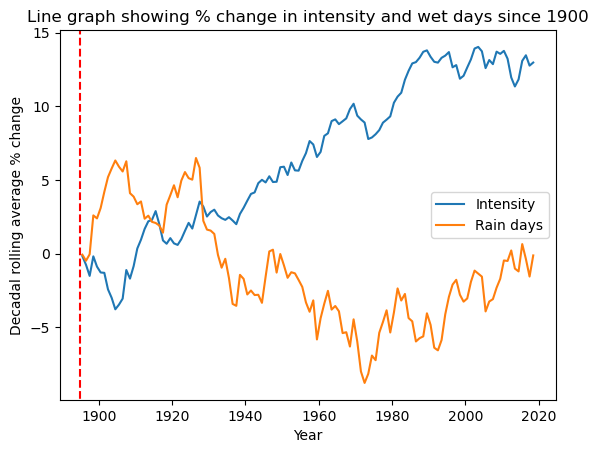

In [38]:
intplt = sns.lineplot(data = meanukraindays.rolling(10).mean(),x='year',y='intensity_norm',label = 'Intensity')\
    .set(xlabel='Year', ylabel='Decadal rolling average % change')
rdplt = sns.lineplot(data = meanukraindays.rolling(10).mean(),x='year',y='raindays_norm',label = 'Rain days')\
    .axvline(x = 1895, ymin = -8, ymax = 13,linestyle = '--', color='red')
plt.legend(loc='best')
plt.title('Line graph showing % change in intensity and wet days since 1900')



In [39]:
#Just a look at the rain totals alone, too:

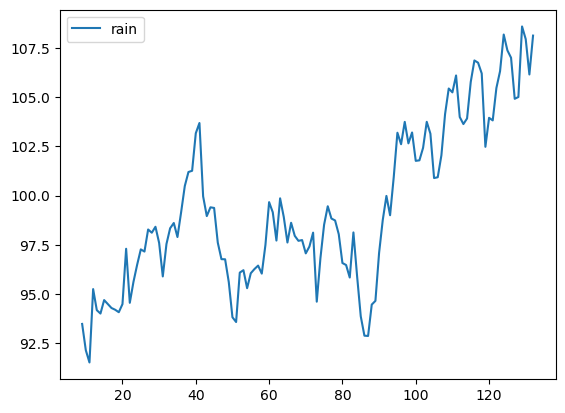

In [40]:
norm_plot = meanukraindays.rolling(10).mean()[['rain']].plot()

Text(0.5, 1.0, 'Rainfall totals vs wet days for each region/country')

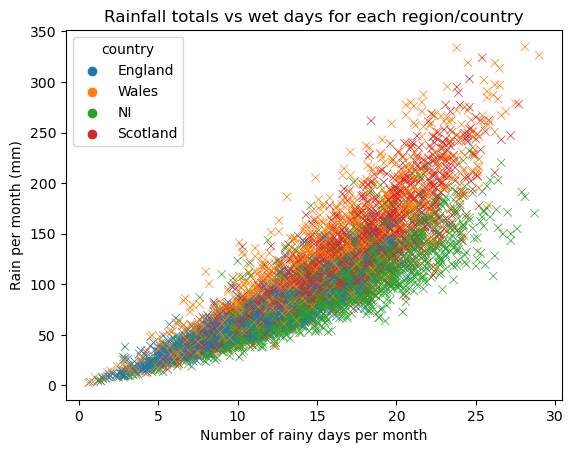

In [41]:
sns.scatterplot(data=ukraindays,x='raindays',y='rain',hue='country',marker='x')
plt.xlabel('Number of rainy days per month')
plt.ylabel('Rain per month (mm)')
plt.title('Rainfall totals vs wet days for each region/country')

In [42]:
# A more obvious correlation between sun hours and rain: 

C:\Users\matro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


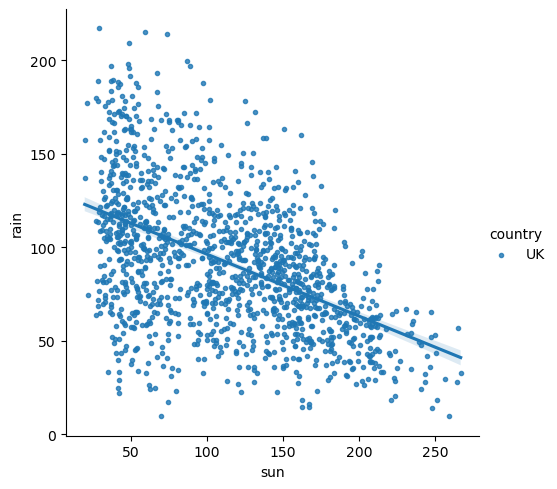

In [43]:
sns.lmplot(data=uk,x='sun',y='rain',hue='country',markers='.')

<Axes: xlabel='month', ylabel='intensity'>

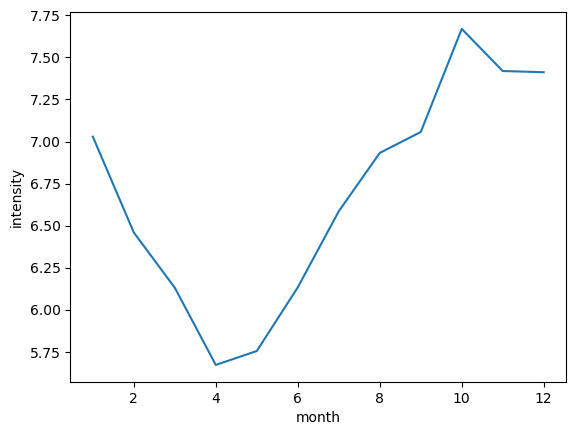

In [44]:
#Does intensity vary by month?

ukrainmonth = ukraindays.drop('country',axis=1).groupby(by=['month']).mean()
sns.lineplot(data = ukrainmonth, x = 'month', y = 'intensity')

## Solar minimums and colder winters

In [45]:
# The following is a list of solar minimum dates, with the solar maximums only estimated
# from these based on the mid points. This should be okay just for an approximation.

solmin = [1890,1902,1913,1923,1933,1944,1954,1964,1976,1986,1996,2008,2019]
solmax = [1896,1908,1918,1928,1939,1949,1959,1970,1981,1991,2002,2014] #estimated

In [46]:
#Picks out years with a solar minimum and puts it in a new column.

def sol(df):
    if df['year'] in solmin:
        return df['mean']
    
uk['solar'] = uk.apply(sol,axis=1)

def solar_max(df):
    if df['year'] in solmax:
        return df['mean']
    
uk['solarmax'] = uk.apply(solar_max,axis=1)


tempmask = uk['max'].notnull()
uk1890 = uk[tempmask]
#uk1890

In [47]:
#Just looking at the first 3 months of the year:

winter = uk1890[uk1890['month'].isin([1, 2, 3])]
wintertemp = winter[['mean','year','month','solar','max','min','solarmax']].groupby(by=['year','month']).mean()
winter_tot = wintertemp.groupby(by='year').sum()/3
winter_tot['year'] = winter_tot.index
#winter_tot['solar'].unique()


Text(0.5, 1.0, 'A graph picking out mean temperatures of winters at solar minimums')

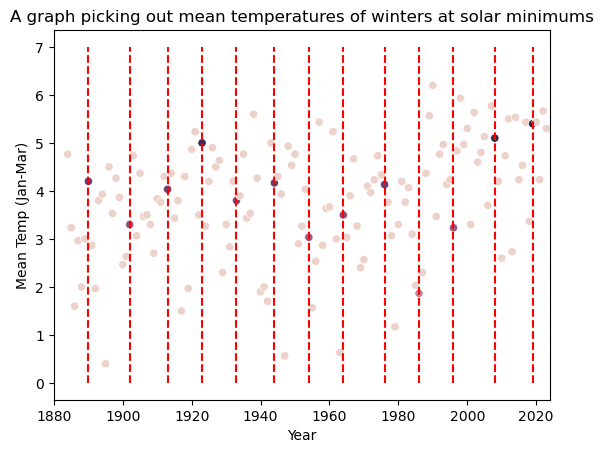

In [48]:
solar_plt = sns.scatterplot(x = 'year', y = 'mean', data = winter_tot,hue ='solar')         
solar_plt.vlines(x = solmin,   # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 7, color='red',linestyle='--') # Top of the plot
solar_plt.legend(title = 'Solar Minimum Years').set_visible(False)
#plt.palette = {'All years': 'cornflowerblue', 'Solar Min': 'fuchsia'}

plt.ylabel('Mean Temp (Jan-Mar)')
plt.xlabel('Year')

solar_plt.set_xlim(1880,2024)
plt.title('A graph picking out mean temperatures of winters at solar minimums')


In [49]:
#There is no discernable drop in winter temperatures following solar minima over this period.

In [50]:
ukmaxmin = winter[['year','solar','solarmax']]#.mean()


In [51]:
ukmaxmin[['solar','solarmax']].mean().round(2)


#Although it can be seen that the mean temperature of winters around the solar maximum is ~0.3C above minimum years. 
#Not really significant though.

solar       3.91
solarmax    4.21
dtype: float64

In [52]:
#sns.boxplot(data = uk1890, y=[['solar','solarmax']])

## Daylight hours/month


In [53]:
#Create dictionary of average length of days in each month to compare to sunshine hours

daylight = {'1':7.62, '2':9.35, '3':11.48, '4':13.80, '5':15.81, '6':16.92, '7':16.44,\
            '8':14.68, '9':12.42,'10': 10.14, '11':8.12, '12':7.08}
#n='3'
#daylight[n]

In [54]:
#Test

for m in range(1,13):
    n = str(m)
    #cx = daylight[n]
    print(daylight[n])

7.62
9.35
11.48
13.8
15.81
16.92
16.44
14.68
12.42
10.14
8.12
7.08


In [55]:
#Function to find the total number of daylight hours each month, including leap years

def dlfun(df):
    for m in range(1,13):
        if df['month'] == m:
            n = str(m)
            
            #for each month, pick out if it has 28, 30 or 31 days to multiply the average length of the day by.
            
            if m == 2:
                dl=28*daylight[n]
                yr = df['year']
                
                # change to 29 days for leap years
                
                if yr%4==0 and yr%100!=0:
                    dl = 29*daylight[n]
                if yr%400==0:
                    dl = 29*daylight[n]
                    return dl
                
            elif m in [1,3,5,7,8,10,12]:
                dl = 31*daylight[n]
            else:
                dl = 30*daylight[n]
            return dl
       

uk['daylight'] = uk.apply(dlfun,axis=1)



Text(0.5, 1.0, 'Approximate day lengths of each month')

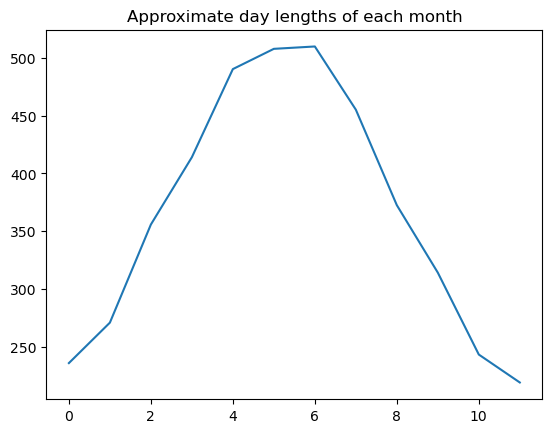

In [56]:
#Lets have a look at the shape of these approximated daylight hours.
uk['daylight'].head(12).plot()
plt.title('Approximate day lengths of each month')

In [57]:
# Add a new column for the amount of sun hours as a percentage of the total available daylight hours.

uk['sunlight'] = uk['sun']/uk['daylight']
uksunlight = uk[uk['sunlight'].notnull()]
uksunlight['sunlight'] = uksunlight['sunlight']*100
uksunlight.head()

C:\Users\matro\AppData\Local\Temp\ipykernel_6156\2500418938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uksunlight['sunlight'] = uksunlight['sunlight']*100


,year,month,rain,frost,max,mean,min,raindays,sun,country,date,solar,solarmax,daylight,sunlight
888,1910,1,109.1,NaN,5.3,2.5,-0.4,17.1,50.9,UK,1910-01-28,NaN,NaN,236.22,21.547710
889,1910,2,122.6,NaN,6.8,3.8,0.7,20.6,72.2,UK,1910-02-28,NaN,NaN,261.80,27.578304
890,1910,3,49.7,NaN,9.0,5.2,1.4,8.2,130.3,UK,1910-03-28,NaN,NaN,355.88,36.613465
891,1910,4,93.4,NaN,9.8,5.9,2.0,16.2,122.8,UK,1910-04-28,NaN,NaN,414.00,29.661836
892,1910,5,70.0,NaN,14.3,9.9,5.5,14.8,190.5,UK,1910-05-28,NaN,NaN,490.11,38.868825


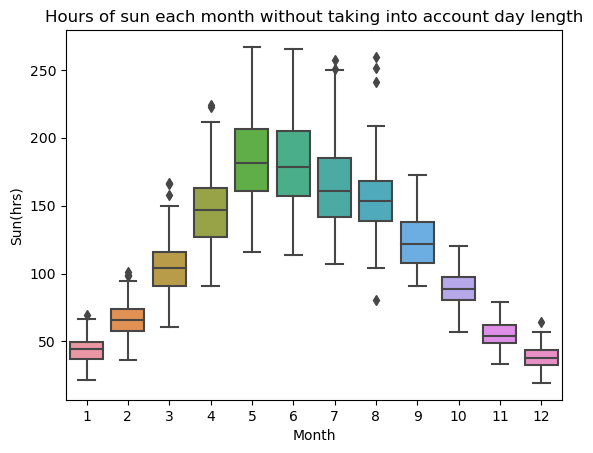

In [58]:
sns.boxplot(data=uksunlight, x = 'month',y='sun')
plt.title('Hours of sun each month without taking into account day length')
plt.ylabel('Sun(hrs)')
plt.xlabel('Month');


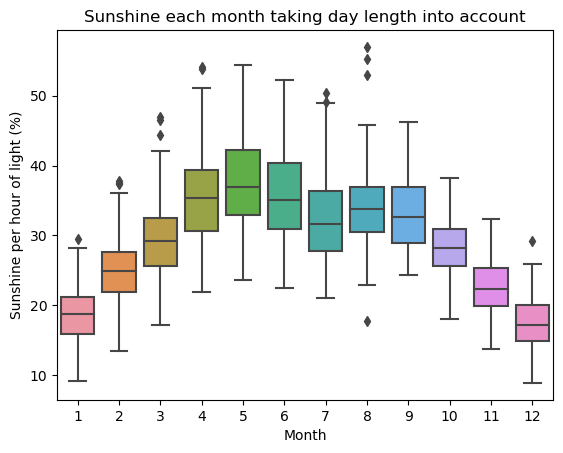

In [59]:
sns.boxplot(data=uksunlight, x = 'month',y='sunlight')
plt.title('Sunshine each month taking day length into account')
plt.ylabel('Sunshine per hour of light (%)')
plt.xlabel('Month');


#Showing the percentage of daylight hours where the sun is shining - a better measure of cloud cover per month.
#Can see that even accounting for the shorter days, there is less nice weather in winter.
#July is also a surprisingly dull month.

<Axes: xlabel='month', ylabel='sunlight'>

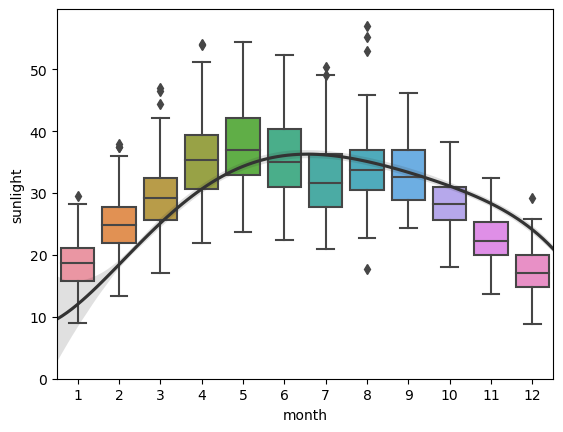

In [60]:
# Just playing around with some extra bits that are pretty meaningless here.
sns.boxplot(
    data=uksunlight, x='month', y='sunlight', zorder=1
)
sns.regplot(
    data=uksunlight, x='month', y='sunlight',
    scatter=False, truncate=False, order=5, color=".2",
)

## Do correlation plots and maybe some nice simple bar charts for each country


### First filter down to just the years where all the data is available... so that includes frost and begins at 1960:

Text(0.5, 1.0, 'Correlation grid between the numeric variables')

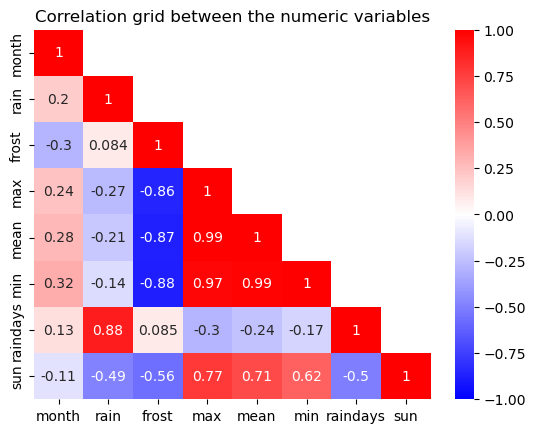

In [61]:
uk60 = ukall[ukall['frost'].notnull()].drop(['country','date','year'],axis=1)
corr = uk60.corr()
#maskymask = np.triu(corr)
maskymask = np.triu(np.ones_like(corr)) 
np.fill_diagonal(maskymask, False)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True, vmin=-1, vmax=1,cmap = 'bwr', mask = maskymask)
plt.title('Correlation grid between the numeric variables')

#Some obvious things to see, some that are a little surprising! 

Frost correlates strongly, negatively with tempterature... of course! Interestingly it also negatively correlates with year, slightly, so I'll have a look at that. 
Also interesting, although expected, that there is a positive correlation between year and temperature.

Also a skew towards warmer, wetter, less frosty months later in the year... a delay in seasonal warmth, expected.
More rain on rainydays, of course. Less sun with rain, of course. But weird that rain has a tiny correlation with frost, I'd expect this to be negative... same for frost/raindays!

Frostier at the start of the year, as expected again due to seasonal warmth delays

All temperatures show a strong correlation to sun, and a weak one as the year progresses.

Cooler on wetter days

Frost also negatively correlates with sun (sort of interesting... although sun is warmer, nights are usually cooler)

C:\Users\matro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(24.500000000000007, 0.5, 'Rain (mm)')

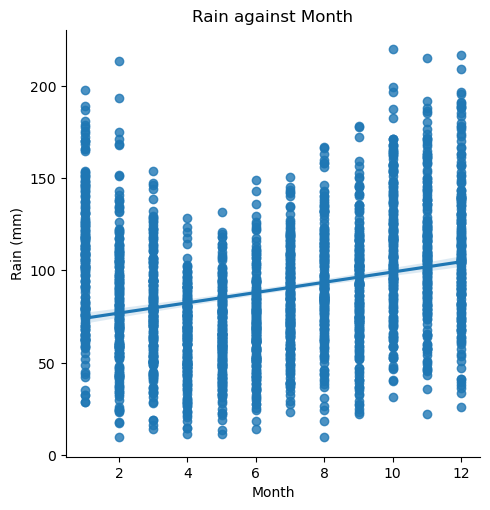

In [62]:
#Why is month correlated with rain (and frost)? Turns out it's because of the clear lack of linearity.

sns.lmplot(data = uk, x='month',y='rain')
plt.title('Rain against Month')
plt.xlabel('Month')
plt.ylabel('Rain (mm)')

In [63]:
ukfrost = uk[uk['frost'].notnull()].drop(['country','date'],axis=1).groupby(by=['year']).sum()[['frost']].reset_index()


C:\Users\matro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


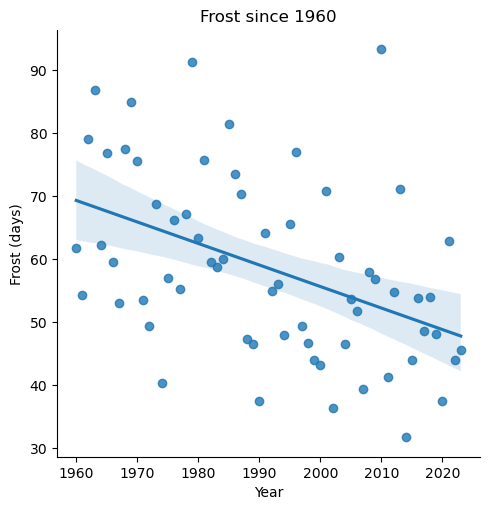

In [64]:
sns.lmplot(data=ukfrost,x='year',y='frost')
plt.title('Frost since 1960')
plt.ylabel('Frost (days)')
plt.xlabel('Year');

## What about if we look back, ignoring frost, from 1890...

In [65]:
uk90 = uk[uk['max'].notnull()].drop(['country','frost'],axis=1)
corr = uk90.corr()

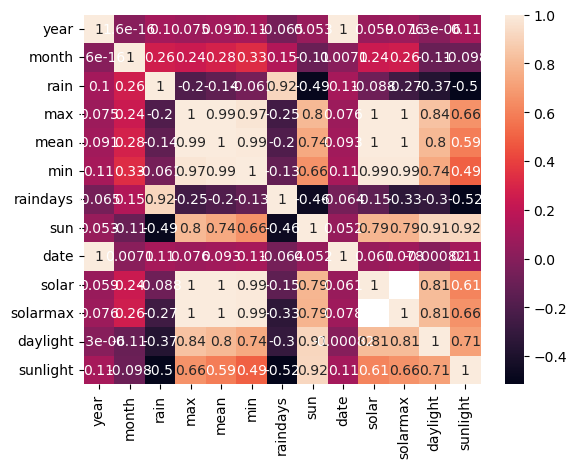

In [66]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True);

C:\Users\matro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


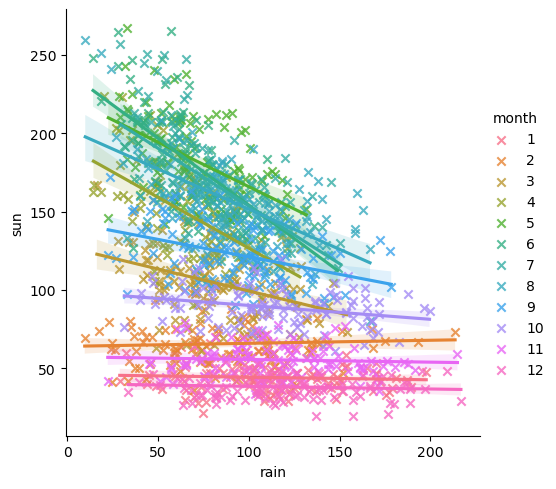

In [67]:
sns.lmplot(data=uksunlight,x='rain',y='sun',hue='month', markers='x');


In [68]:
# So we see that summer months have less sun as more rain falls whereas
# winter months are pretty consisten with a lack of sun regardless of rain
# The same is largely true still if we replace 'sun' for 'sunlight'

## Looking at rainfall on a decadel level:

In [69]:
#Group all the dats into decades

uk_rain_dec = uk[['rain','year','month']].groupby((uk.year//10)*10).mean().drop('month',axis=1)
uk_rain_dec

,rain,year
year,,
1830,84.031250,1837.5
1840,83.230000,1844.5
1850,79.255833,1854.5
1860,88.694167,1864.5
1870,91.155000,1874.5
1880,85.965000,1884.5
1890,84.658333,1894.5
1900,85.993333,1904.5
1910,90.410833,1914.5


C:\Users\matro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


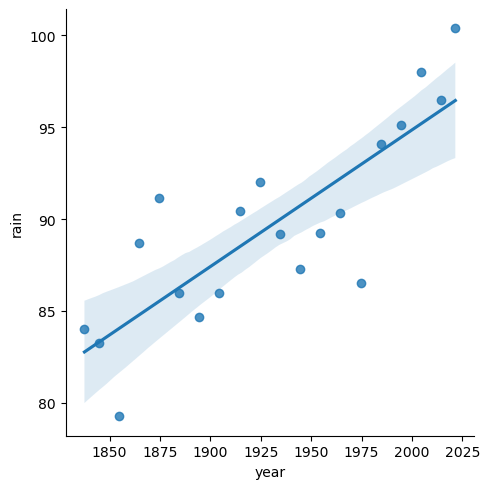

In [70]:
sns.lmplot(data=uk_rain_dec,x='year',y='rain');

In [71]:
#Now what if we group them monthly, averaging over the decades?

uk_rain_dec2 = uk[['rain','year','month']].groupby([(uk.year//10)*10,'month']).mean().drop('year',axis=1)\
                        .reset_index('month')

Text(0.5, 1.0, 'A graph to show mean monthly rainfall by month, since 1830')

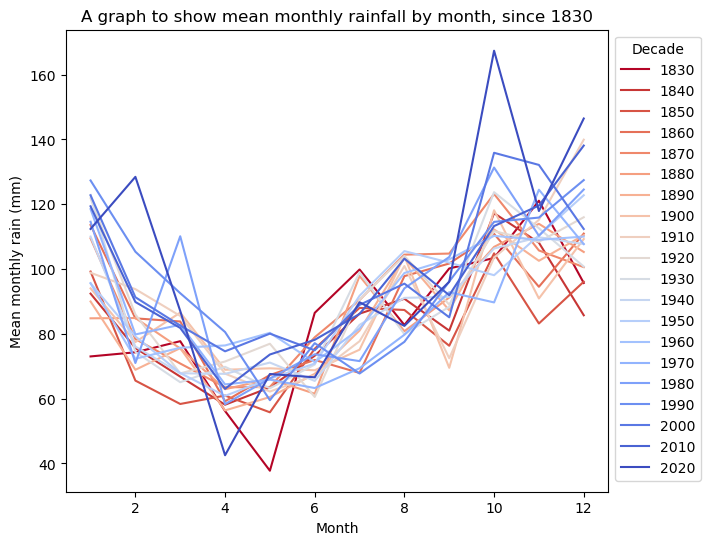

In [72]:
plt.figure(figsize=[7,6])
raindec = sns.lineplot(data=uk_rain_dec2,x='month',y='rain',hue='year',palette= 'coolwarm_r',legend='full')
#raindec.set_xticklabels(['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.setp(raindec.get_legend().get_texts(), fontsize='7') # for legend text
plt.legend(title='Decade') 
plt.ylabel('Mean monthly rain (mm)')
plt.xlabel('Month')
sns.move_legend(raindec, "upper left", bbox_to_anchor=(1, 1))
plt.title('A graph to show mean monthly rainfall by month, since 1830')

In [73]:
# The blues are evidence that over winter at least, we have more rain than we used to.

## Top 10 lists

In [74]:
uknum = uk.drop(['country','solar','daylight','sunlight','date'],axis=1)
hottestyears = uknum.groupby(by=['year']).mean().sort_values(by='mean',ascending=False).head(10).reset_index()
hottestyears.index += 1
hottestyears['Year'] = hottestyears['year']
hottestyears['Temperature (C)'] = hottestyears['mean'].round(2)
hottestyears[['Year','Temperature (C)']]

,Year,Temperature (C)
1,2022,10.00
2,2023,9.95
3,2014,9.86
4,2006,9.66
5,2011,9.61
6,2020,9.59
7,2007,9.52
8,2017,9.49
9,2003,9.43
10,2004,9.42


### Just checked and this is true! 10 hottest years all occured since 2003!

In [75]:
uknum = uk.drop(['country','solar','daylight','sunlight','date'],axis=1)
wettestyears = uknum.groupby(by=['year']).mean().sort_values(by='rain',ascending=False).head(10).reset_index()
wettestyears.index += 1
wettestyears[['year']]

,year
1,1872
2,2000
3,1903
4,2020
5,2012
6,1877
7,1998
8,1954
9,2008
10,2014


In [76]:
ukrain = ukall.copy()[['rain','country']]


In [77]:
# Commented out as it's slow to load... but here's a beautiful set of pairplots...

#sns.pairplot(data=uk1890,vars=['year','mean','sun','rain','raindays','frost'])
#plt.title('Grid of pairplots to check if any combination of variables looks worthy of more attention')

In [78]:
# Have a look at monthly trends for the UK

ukf = uk.drop(['date','country'], axis=1)#,inplace=True)
ukf2 = ukf.groupby(by=['month']).mean().reset_index()
ukf2.head()

,month,year,rain,frost,max,mean,min,raindays,sun,solar,solarmax,daylight,sunlight
0,1,1929.5,106.648404,12.445312,5.881429,3.197857,0.535000,15.519549,44.141228,3.792308,3.350000,236.220000,0.186865
1,2,1929.5,81.685106,11.721875,6.287143,3.342143,0.416429,12.567669,65.696491,3.007692,4.041667,264.087766,0.248765
2,3,1929.5,77.816489,8.800000,8.360714,4.854286,1.364286,12.957143,104.922807,4.915385,5.250000,355.880000,0.294826
3,4,1929.5,65.117021,5.014062,11.140714,7.027857,2.930714,11.798496,147.638596,7.015385,7.208333,414.000000,0.356615
4,5,1929.5,66.669681,1.235937,14.500714,10.002143,5.601429,11.805263,183.250877,9.853846,10.583333,490.110000,0.373897


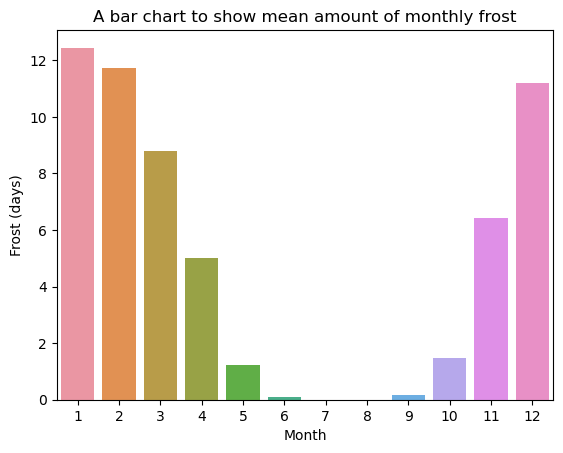

In [79]:
sns.barplot(data = ukf2, x='month',y='frost')#,hue='month')
plt.title('A bar chart to show mean amount of monthly frost')
plt.xlabel('Month')
plt.ylabel('Frost (days)');

In [80]:
#Started out looking at number of frosts in June, hence variable name
# but ended up exploring, the month now is 8 (August)...

junfrost = uk[uk['month'] == 8][['frost','year']]
frostmsk = junfrost['frost']>0
junfrost[frostmsk].groupby(by = 'year').mean()

,frost
year,
1964,0.1
1973,0.1
1977,0.1
1999,0.1


## What with this year being the 2nd most named storms on record... so far...
### I read on the news about the other previous most stormy year (records only begain in 2015).
### 2015/16 leads the way. A quick look at the rainfall to see if this agrees with my data:

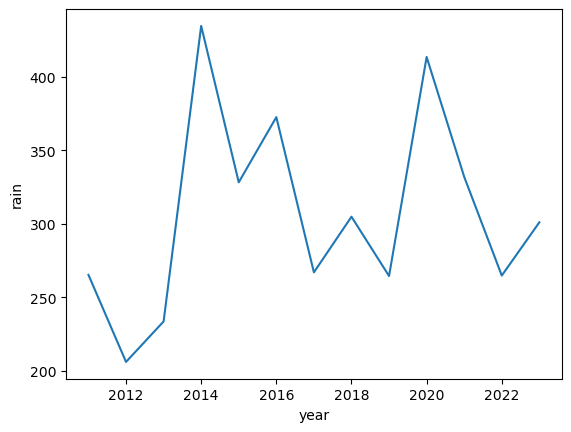

In [81]:
uk2000 = uk[uk['year']>2010].drop(['max','min','mean','country','date','sun','frost','solar','solarmax','daylight','sunlight'],axis=1)
uk2000w = uk2000[uk2000['month'].isin([1,2,3])].groupby(by='year').sum().reset_index()
sns.lineplot(data=uk2000w,x='year',y='rain');


In [82]:
# Not particularly, although it is one of the wetter years. If I plot the rolling wetness
# with the annual number of storms overlaid - then do we see any patter?

In [83]:
# Set up a new thing with the number of storms per year...
storms = {'year': [2015, 2016,2017,2018,2019,2020,2021,2022,2023], 'count': [11,5,8,8,6,5,6,2,10]}
stormsdf = pd.DataFrame(data=storms)

#Put the total number in the middle of each year for plotting purposes, to match what comes with the rolling average next
stormsdf['date'] = pd.to_datetime(dict(year=stormsdf.year, month=6, day=28))
stormsdf.sort_values(by='date', inplace = True) 
stormsdf = stormsdf.reset_index().drop(['index'], axis=1)

# Normalise the scale so as to be more easily comparable to rain data
rangestorms = stormsdf['count'].max() - stormsdf['count'].min()
stormsdf['count'] = (stormsdf['count']- stormsdf['count'].min())/rangestorms 


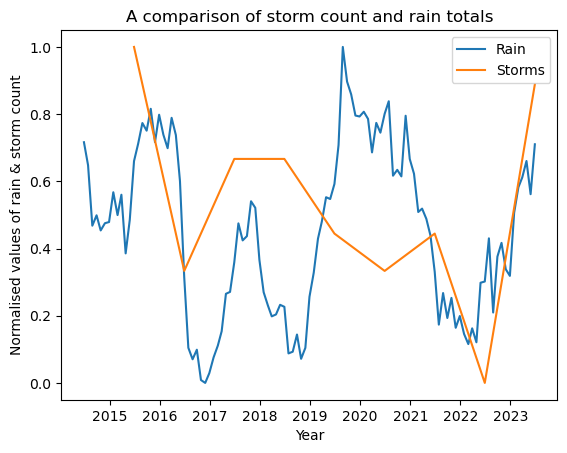

In [84]:
from pandas.tseries.offsets import DateOffset

# Choose the period over which to have a rolling average, and an offset to reset the date that this will be plotted.
window = 12
offset = int(window/2)

# uk2012, later changed to only have >2013, but who cares...
# Find the rolling averages after grouping, then undo grouping...
uk2012 = uk[uk['year']>2013].drop(['max','min','mean','country','date','sun','frost','solar','solarmax','daylight','sunlight']\
                                  ,axis=1).groupby(by=['year','month']).mean()#.reset_index('month')
uk2012 = uk2012.rolling(window).mean().reset_index()

# Set a date column.
uk2012['date'] = pd.to_datetime(dict(year=uk2012.year, month=uk2012.month, day=28))
uk2012.sort_values(by='date', inplace = True) 
uk2012 = uk2012.reset_index().drop(['index'], axis=1)

#Shift the dates back so that the rolling average is centered around the correct point.
uk2012['date'] = uk2012['date'] - DateOffset(months=offset)

# Normalise to compare to the storm data.
rangerain = uk2012['rain'].max()-uk2012['rain'].min()
uk2012['rain'] = (uk2012['rain'] - uk2012['rain'].min())/rangerain

sns.lineplot(data = uk2012,x='date',y='rain',label = 'Rain')
sns.lineplot(data = stormsdf,x='date',y='count',label = 'Storms');
plt.ylabel('Normalised values of rain & storm count')
plt.xlabel('Year')
plt.title('A comparison of storm count and rain totals')
plt.legend()

# Much larger dataset of temperatures, daily from 1772?

In [85]:
#HADley Central Englant Timeseries is a much longer set - but complex to download them all and way too large for now.

hc = pd.read_csv('data/weather/hadcet.csv')
hc.head()

,Date,hmean,hmax,hmin
0,1772-01-01,3.2,NaN,NaN
1,1772-01-02,2.0,NaN,NaN
2,1772-01-03,2.7,NaN,NaN
3,1772-01-04,2.7,NaN,NaN
4,1772-01-05,1.5,NaN,NaN


In [86]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92064 entries, 0 to 92063
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    92064 non-null  object 
 1   hmean   92064 non-null  float64
 2   hmax    53348 non-null  float64
 3   hmin    53348 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.8+ MB


In [87]:
hc['date'] = pd.to_datetime(hc['Date'],format='mixed')
hc['year'] = hc['date'].dt.year
hc['month'] = hc['date'].dt.month
hc.head(4)

,Date,hmean,hmax,hmin,date,year,month
0,1772-01-01,3.2,NaN,NaN,1772-01-01,1772,1
1,1772-01-02,2.0,NaN,NaN,1772-01-02,1772,1
2,1772-01-03,2.7,NaN,NaN,1772-01-03,1772,1
3,1772-01-04,2.7,NaN,NaN,1772-01-04,1772,1


In [88]:
#ABORTED THIS PLAN. WAY TOO BIG AND SLOW.

#sns.scatterplot(data = hc, x ='Date',y='hmean')

## Can we pick out the months where both sun and rain totals are high? Ah they summer? - has this been done in the rainbow graph just up?

### Also can we see if rain is more intense in some months?


Text(0.5, 0, 'Monthly Rainfall (mm)')

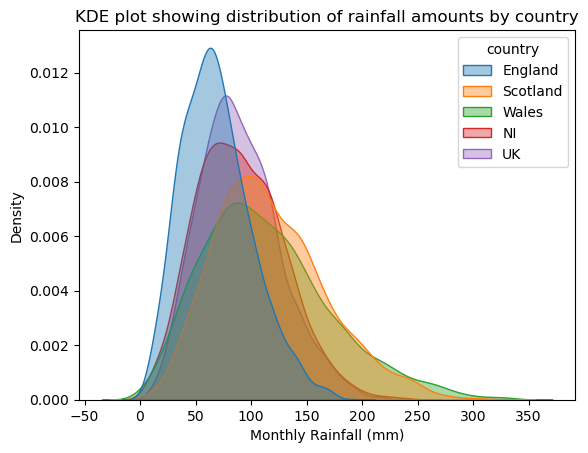

In [89]:
sns.kdeplot(data=ukall, x="rain", hue="country", fill=True, common_norm=False, alpha=0.4, hue_order=['England', 'Scotland', 'Wales','NI','UK'])

plt.title('KDE plot showing distribution of rainfall amounts by country')
plt.xlabel('Monthly Rainfall (mm)')

## Have the max-min range of temperatures, monthly or anually changed?

C:\Users\matro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


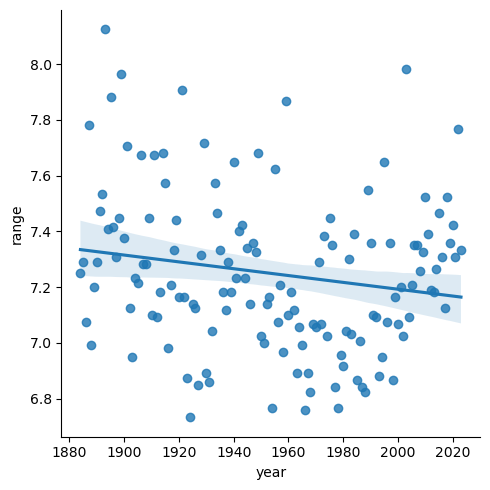

In [90]:
# See if the range of temperatures (max-min) each month has changed over the century

ukrange = uk[uk['max'].notnull()][['year','month','max','min']].copy()
ukrange['range'] = uk['max']-uk['min']
ukrange = ukrange.groupby('year').mean().reset_index()
ukrange


sns.lmplot(data=ukrange,x='year',y='range')

# If anything, it looks like the range of temperatures has actually decreased!

C:\Users\matro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


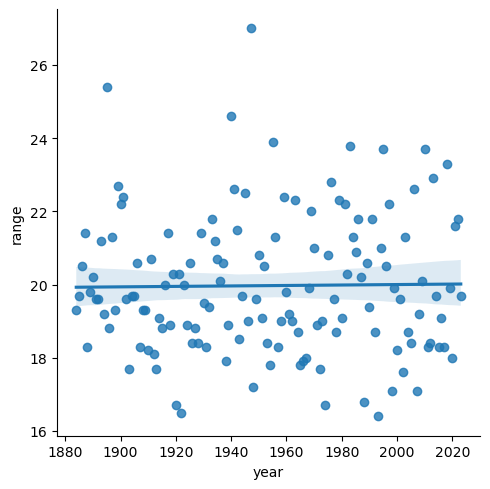

In [91]:
ukrange = uk[uk['max'].notnull()][['year','month','max','min']].copy()
ukmax = ukrange.groupby(by='year').max()
ukmin = ukrange.groupby(by='year').min()[['min']]
ukrange = pd.merge(ukmax, ukmin, on='year').drop('min_x',axis=1)
ukrange['range']=ukrange['max']-ukrange['min_y']
ukrange = ukrange.reset_index()
ukrange
sns.lmplot(data=ukrange,x='year',y='range')


In [92]:
# On both counts, it would seem there is no change in max-min temp range over the last century

In [93]:
# Some very large spatial files to use, but not for this computer either...


# import netCDF4 as nc
# import xarray as xr

# ds = xr.open_dataset('data/nctest.nc')
# df = ds.to_dataframe()

